<a href="https://colab.research.google.com/github/shane-moxley/linear-regression/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports the libraries and file we will use for this simple linear regression problem.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import time
from google.colab import files
uploaded_file = files.upload()

Saving cars.csv to cars (6).csv


Converts imported csv into a pandas dataframe.

In [50]:
filename = 'cars.csv'
df = pd.read_csv(io.BytesIO(uploaded_file[filename]))
print(df.head())

    mpg  weight
0  21.0   2.620
1  21.0   2.875
2  22.8   2.320
3  21.4   3.215
4  18.7   3.440


Finds the mean and population variance of weight then uses these values to normalize the weight.

In [51]:
feature = 'weight'
target ='mpg'

#calculates mean
mean = 0
for sample_weight in df[feature]:
  mean += sample_weight
mean /= len(df)
print('Mean is: ', mean)

#calculates population variance
pop_variance = 0
for sample_weight in df[feature]:
  pop_variance += (sample_weight - mean)**2
pop_variance /= (len(df))
print('Population variance is: ', pop_variance)

#scales weight and updates values in the dataframe, updates feature column name, and updates variable holding feature column name
for i in range(len(df)):
  df[feature][i] = (df[feature][i] - mean) / (pop_variance**0.5)
df.rename(columns = {feature :'scaled_' + feature}, inplace=True)
feature = 'scaled_' + feature

print('First five values of normalized dataframe: \n', df.head())

Mean is:  3.2172499999999995
Population variance is:  0.9274608750000002
First five values of normalized dataframe: 
     mpg  scaled_weight
0  21.0      -0.620167
1  21.0      -0.355382
2  22.8      -0.931678
3  21.4      -0.002336
4  18.7       0.231297


Calculates the new sample mean and variance of the normalized weight.

In [52]:
#calculates new sample mean
mean = 0
for sample_weight in df[feature]:
  mean += sample_weight
mean /= len(df)
print('New mean is: ', mean)

#calculates new population variance
pop_variance = 0
for sample_weight in df[feature]:
  pop_variance += (sample_weight - mean)**2
pop_variance /= len(df)
print('New population variance is: ', pop_variance)

New mean is:  4.9439619065339e-16
New population variance is:  0.9999999999999997


Scatter plot of normalized data.

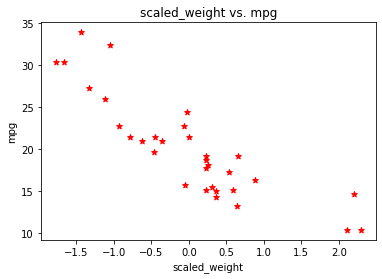

In [53]:
#plots normalized data
plt.scatter(df[feature], df[target], color='red', marker='*')
plt.xlabel(feature)
plt.ylabel(target)
plt.title(feature + ' vs. ' + target)
plt.show()

Gradient Descent Algorithm for simple linear hypothesis.

In [54]:
param1, old_param1 = 0, -1
param2, old_param2 = 0, -1
learning_rate = 0.2
convergence_constant = 0.0001
while (abs(param1 - old_param1) >= convergence_constant) and (abs(param2 - old_param2) >= convergence_constant):
  #calculates the derivative of the cost function with respect to param1
  d1 = 0
  for i in range(len(df)):
    d1 += (param1 + param2 * df[feature][i]) - df[target][i]
  d1 /= len(df)

  #calculates the derivative of the cost function with respect to param2
  d2 = 0
  for i in range(len(df)):
    d2 += ((param1 + param2 * df[feature][i]) - df[target][i]) * df[feature][i]
  d2 /= len(df)

  #updates the values of the parameters using gradient descent formula and stores their old values
  old_param1 = param1
  old_param2 = param2

  param1 = old_param1 - learning_rate * d1
  param2 = old_param2 - learning_rate * d2
  
print('param1: ', param1, ' param2: ', param2)

param1:  20.089257702914416  param2:  -5.146630777451734


Data plot with 1st iteration regression line: the regression line does not appear to run through the mass of data, but does split the data points almost exactly evenly.



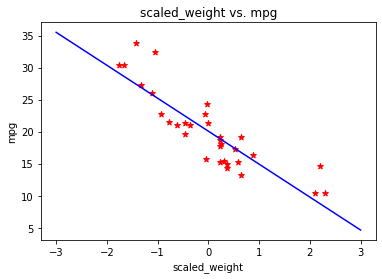

In [55]:
#plots sample data and first hypothesis
plt.scatter(df[feature], df[target], color='red', marker='*')
x = []
y = []
for i in range(-3, 4):
  x.append(i)
  y.append(param1 + param2 * i)
plt.plot(x, y, color='blue')
plt.xlabel(feature)
plt.ylabel(target)
plt.title(feature + ' vs. ' + target)
plt.show()

Data plot with multiple regression lines derived with different learning rates.

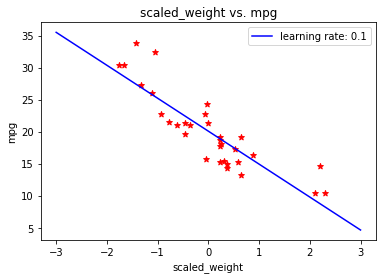

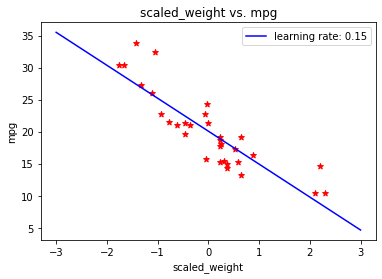

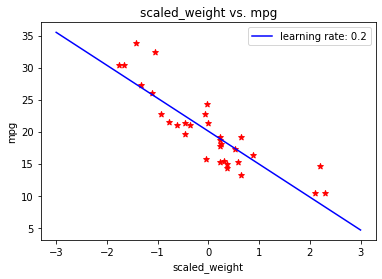

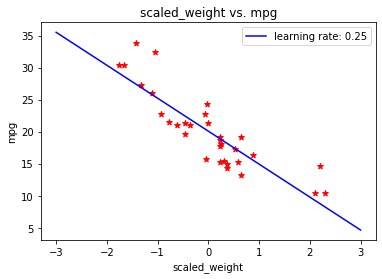

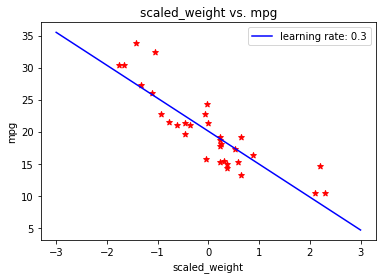

In [56]:
#arrays for learning rates and their respective runtimes
learning_rates = [0.10, 0.15, 0.20, 0.25, 0.30]
learning_rate_runtimes = []

#arrays for keeping track of the cost across iterations of the gradient descent alogrithm
cost1array_x, cost2array_x, cost3array_x, cost4array_x, cost5array_x = [], [], [], [], []
cost1array_y, cost2array_y, cost3array_y, cost4array_y, cost5array_y = [], [], [], [], []

#estimates the parameters for each learning rate and plots learned hypothesis
for rate in learning_rates:
  #starts runtime
  start = time.time()
  param1, old_param1 = 0, -1
  param2, old_param2 = 0, -1
  learning_rate = 0.2
  convergence_constant = 0.0001

  iterator = 1
  while (abs(param1 - old_param1) >= convergence_constant) and (abs(param2 - old_param2) >= convergence_constant):
    #calculates the mean squared error(cost) at each iteration
    cost = 0
    for i in range(len(df)):
      cost += (param1 + param2 * df[feature][i] - df[target][i])**2
    cost *= 1 / (2 * len(df))

    #assigns cost and iteration to correct array based on the learning rate
    if(rate == learning_rates[0]):
      cost1array_x.append(iterator)
      cost1array_y.append(cost)
    elif(rate == learning_rates[1]):
      cost2array_x.append(iterator)
      cost2array_y.append(cost)
    elif(rate == learning_rates[2]):
      cost3array_x.append(iterator)
      cost3array_y.append(cost)
    elif(rate == learning_rates[3]):
      cost4array_x.append(iterator)
      cost4array_y.append(cost)
    else:
      cost5array_x.append(iterator)
      cost5array_y.append(cost)
    iterator += 1
    #calculates the derivative of the cost function with respect to param1
    d1 = 0
    for i in range(len(df)):
      d1 += (param1 + param2 * df[feature][i]) - df[target][i]
    d1 /= len(df)

    #calculates the derivative of the cost function with respect to param2
    d2 = 0
    for i in range(len(df)):
      d2 += ((param1 + param2 * df[feature][i]) - df[target][i]) * df[feature][i]
    d2 /= len(df)

    #updates the values of the parameters using gradient descent formula and stores their old values
    old_param1 = param1
    old_param2 = param2

    param1 = old_param1 - rate * d1
    param2 = old_param2 - rate * d2
  #ends runtime
  end = time.time()
  learning_rate_runtimes.append(end - start)
  
  #plots hypothesis estimated with current learning rate
  plt.scatter(df[feature], df[target], color='red', marker='*')
  x = []
  y = []
  for i in range(-3, 4):
    x.append(i)
    y.append(param1 + param2 * i)
  plt.plot(x, y, color='blue', label='learning rate: ' + str(rate))
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.title(feature + ' vs. ' + target)
  plt.legend()
  plt.show()

Plot of iteration vs cost for each different learning rate and scatter plot of runtime for each learning rate.

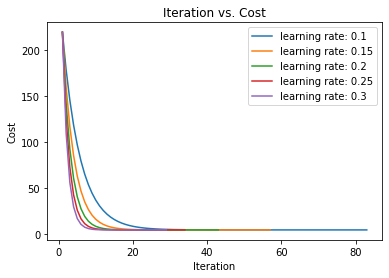

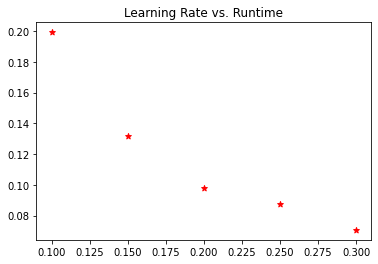

In [57]:
#plots each cost vs iteration function
plt.plot(cost1array_x, cost1array_y, label='learning rate: '+str(learning_rates[0]))
plt.plot(cost2array_x, cost2array_y, label='learning rate: '+str(learning_rates[1]))
plt.plot(cost3array_x, cost3array_y, label='learning rate: '+str(learning_rates[2]))
plt.plot(cost4array_x, cost4array_y, label='learning rate: '+str(learning_rates[3]))
plt.plot(cost5array_x, cost5array_y, label='learning rate: '+str(learning_rates[4]))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Iteration vs. Cost')
plt.legend()
plt.show()

#plots the runtime of each learning rate
plt.scatter(learning_rates, learning_rate_runtimes, color='red', marker='*')
plt.title('Learning Rate vs. Runtime')
plt.show()